In [ ]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read data
df_info= pd.read_csv("birth.csv")
df_info

,year,地域コード,地域,birth,注記
0,1978,0,全国,1708643,NaN
1,1979,0,全国,1642580,NaN
2,1980,0,全国,1576889,NaN
3,1981,0,全国,1529455,NaN
4,1982,0,全国,1515392,NaN
5,1983,0,全国,1508687,NaN
6,1984,0,全国,1489780,NaN
7,1985,0,全国,1431577,NaN
8,1986,0,全国,1382946,NaN
9,1987,0,全国,1346658,NaN


In [ ]:
# Select only the year and birth columns
df_new = df_info[["year", "birth"]]
df_new

,year,birth
0,1978,1708643
1,1979,1642580
2,1980,1576889
3,1981,1529455
4,1982,1515392
5,1983,1508687
6,1984,1489780
7,1985,1431577
8,1986,1382946
9,1987,1346658


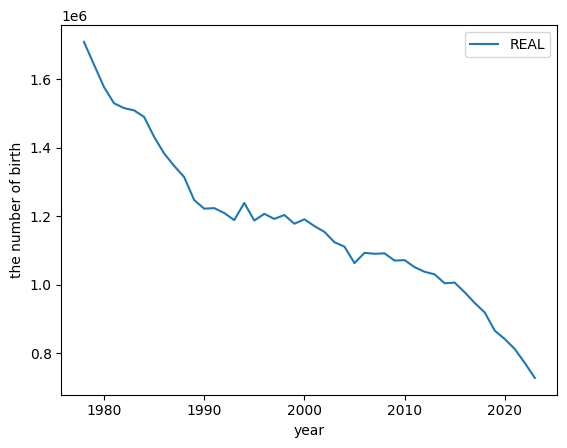

In [ ]:
# 1978年以降のデータを抽出します。
df_new_after_1978 = df_new[df_new['year'] >= 1978]

# plot
plt.plot(df_new_after_1978["year"],df_new_after_1978["birth"],label="REAL")
plt.legend(loc="best")
# setting for graph
plt.xlabel("year")
plt.ylabel("the number of birth")
plt.savefig("test.pdf")

773855.55


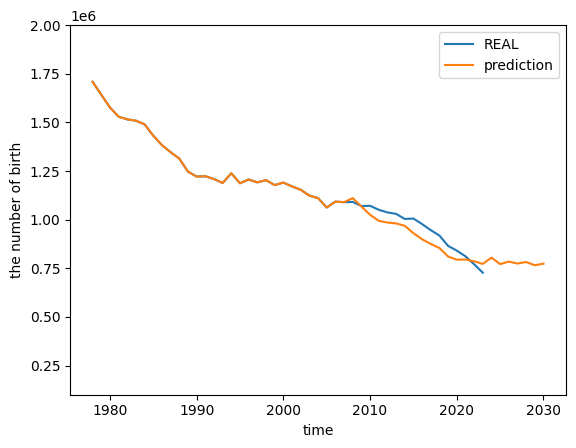

In [ ]:
# my model
T0 = 1978
TMax = 2030
alpha = 0.65
DeltaT = 30
NumTime = TMax - T0 + 1

# initialize
prediction = np.zeros(NumTime)
for t in range(0, DeltaT):
  prediction[t] = df_new_after_1978["birth"][t]
# prediction
for t in range(DeltaT, NumTime):
  prediction[t] = alpha * prediction[t-DeltaT]

# print result
print(prediction[-1])

# plot
plt.plot(df_new_after_1978["year"],df_new_after_1978["birth"],label="REAL")
plt.plot(np.linspace(T0,2030,num=NumTime),prediction[:],label=f"prediction")
plt.ylim(bottom=1e5,top=2e6)
# setting
plt.xlabel("time")
plt.ylabel("the number of birth")
plt.legend()
plt.savefig("birth.pdf")

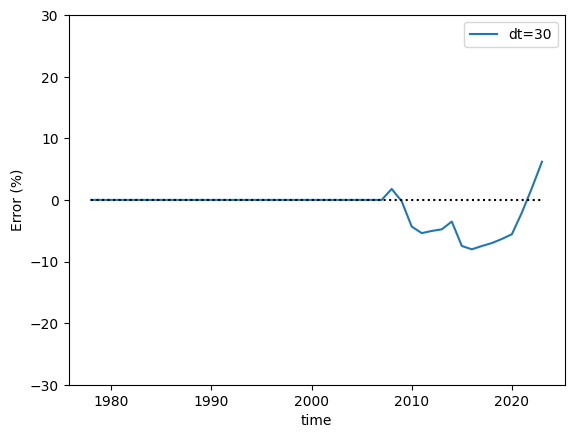

In [ ]:
error = np.zeros(2023-T0+1)
for i in range(2023-T0+1):
  error[i] = (prediction[i] - df_new_after_1978["birth"][i]) * 100/ df_new_after_1978["birth"][i]

plt.plot(np.linspace(T0,2023,num=2023-T0+1),error,label=f"dt={DeltaT}")
plt.plot(np.linspace(T0,2023,num=2023-T0+1),np.zeros(2023-T0+1),linestyle="dotted",color="black")
plt.ylim(bottom=-30, top=30)
plt.xlabel("time")
plt.ylabel("Error (%)")
plt.legend()
plt.savefig(f"Error{DeltaT}.pdf")